## T-tests

In [9]:
import numpy as np
import pandas as pd
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

plt.style.use("fivethirtyeight")

In [16]:
HTML('<iframe width="560" height="400" src="https://www.youtube-nocookie.com/embed/fKZA5waOJ0U?autoplay=1"></iframe>')

C:\Users\Teamwork\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


This is the week 4 notebook. We use a statistical tool to measure the difference between two means of two groups. We are using the t-statistic abbreviated from "hypothesis test statistic". This is the student t distribution or student's t test. Another reason to love to Guinness!!

### Import our packages

### Fake data values

In [2]:
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0,0.4
N = 40

a = np.random.normal(loc=m_a, scale=s_a, size=40)
b = np.random.normal(loc=m_b, scale=s_b, size=40)

df = pd.DataFrame({'Category':['A'] * len(a) + ['B'] * len(b), 'Value':np.hstack([a,b])})

In [3]:
df

,Category,Value
0,A,1.105892
1,A,0.997033
2,A,0.827106
3,A,0.451511
4,A,0.839608
...,...,...
75,B,2.774846
76,B,2.001598
77,B,2.649432
78,B,2.418760


### Plot data

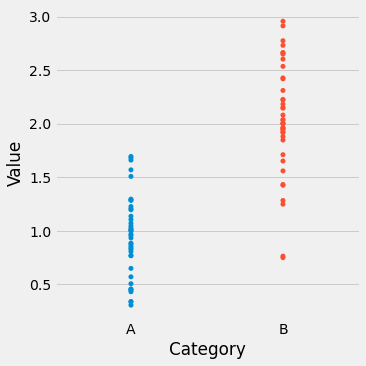

In [4]:
sns.catplot(x='Category', y='Value', jitter=False, data=df);

### The actual t-test!!!!

In [19]:
# This the scipy stats version
t_ss, p_ss = ss.ttest_ind(a,b)
print(f"P_scipy: {p_ss:0.2f}")

P_scipy: 0.00


In [20]:

# test statistic, pvalue of the t-test, degrees of freedom used in the t-test
t, p, d = stat.ttest_ind(a, b)
print(f"P: {p:0.2f}")


P: 0.00


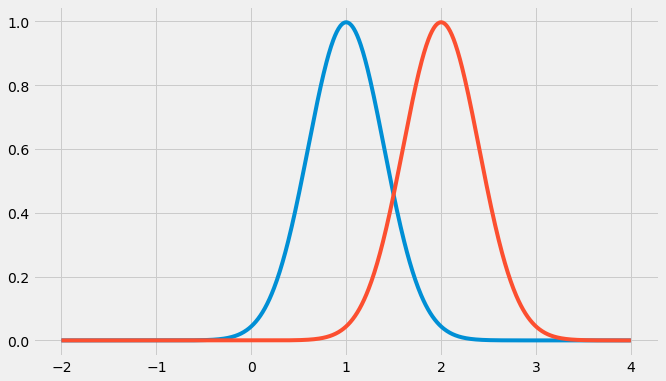

In [21]:
x = np.linspace(-2.0, 4.0, 1000)

y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

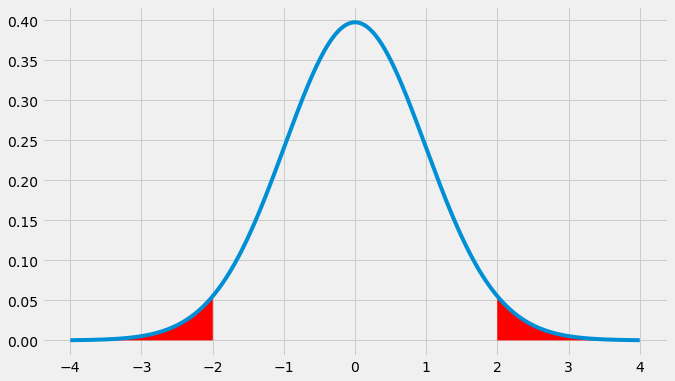

In [22]:
x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

### Type I errors - False Positives

In [23]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= 0.05:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.39%


### Type II errors - False Negatives

In [24]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

35.38%
